<div class="alert alert-block alert-info">
Наташа, привет! Был в отпуске, тяжело вкатываться. Немного расстраивает, что пауза на отдых или на изучение другой темы и уже подзабываешь некоторые детали какой-то прошлой темы. Нужно больше практики. Надеюсь, что проект не потребует больших сил в проверке, а мне потом останется немного (или вообше не понадобится )) дорабатвать его. Консультацию не успел посмотреть еще. Сорри, если что-то прямо протеворечит. Большое спасибо.))
</div>   

<div class="alert alert-block alert-info">
# И снова привет!) Сделал все доработки, в том числе построил графики по ЛТВ и РОМИ по источникам. Заранее прошу прощение за некоторую хаотику характера доработки, возможно, присутствуют некие лишние таблицы и непоследовательность их названий, следующий раз постраюаьс избегать такого, большое спасибо за работу со мной.
</div> 

>**_<span style="color:green">Доработки крутейшие! ЗАЧЕТ!</span>_**

> Максим, привет! Спасибо за своевременную сдачу этого непростого проекта. Не переживай, часто пройденные темы наоборот укладываются после отпуска по-новому и лучше концептуализируются. Надеюсь, что вспоминать будет не так сложно, как проходить впервые. Что ж, приступим к проверке : )
>
> Ниже в ноутбуке будут мои комментарии, закодированные разными цветами.
>
>**_<span style="color:green">Зеленым будут выделены места, которые хочется особенно отметить, как хорошие. </span>_**
>**_<span style="color:green"></span>_**
>
> **_<span style="color:red">Недочеты, откомментированные красным обязательны к доработке – без их исправления домашка не будет зачтена. </span>_**
>   **_<span style="color:red"></span>_**
>
> **_<span style="color:orange">Недочеты и подсказки, откомментированные оранжевым, учесть желательно, но их доработка не является обязательным условнием для зачета.</span>_**
> _**<span style="color:orange"></span>**_
>
> Если какие-то подзадачи к домашке не откомментированны – значит, с ними все окей, нет возражений.
>
> Если ошибка влечет за собой дальнейшие неточности рассчетов или выводов – пожалуйста, поправь их тоже, чтобы аналитический отчет был целостным.
>
> Пожалуйста, не удаляй мои старые комментарии при передаче – по ним проще ориентироваться при перепроверке. Если есть желание, то при пересдаче можно выделить свои доработки удобным способом (цветом или форматированием в markdown, дополнительным комментарием в коде).

In [592]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# Загрузка данных

In [593]:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

# Построение отчетов и подсчет метрик

# Продукт

In [594]:
visits.head()

,Uid,Device,End Ts,Source Id,Start Ts
0,16879256277535980062,touch,20.12.2017 17:38,4,20.12.2017 17:20
1,104060357244891740,desktop,19.02.2018 17:21,2,19.02.2018 16:53
2,7459035603376831527,touch,01.07.2017 1:54,5,01.07.2017 1:54
3,16174680259334210214,desktop,20.05.2018 11:23,9,20.05.2018 10:59
4,9969694820036681168,desktop,27.12.2017 14:06,3,27.12.2017 14:06


In [595]:
visits.rename(columns = {'Uid' : 'uid', 'Device' : 'device', 'End Ts' : 'end_ts', 'Source Id' : 'source_id', 'Start Ts' : 'start_ts'}, inplace = True)

#Приводим все названия к правильному формату

In [596]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358532 entries, 0 to 358531
Data columns (total 5 columns):
uid          358532 non-null uint64
device       358532 non-null object
end_ts       358532 non-null object
source_id    358532 non-null int64
start_ts     358532 non-null object
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [597]:
visits['device'] = visits['device'].astype('category')
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits['end_ts'] = pd.to_datetime(visits['end_ts'])

#Привел к правильным форматам, только что-то получилось ресурсоемко, долго компилировалось.

> _**<span style="color:orange">Да, это норма, только питон не компилируемый язык, так что корректнее сказать просто "считалось", jfyi.</span>**_

In [598]:
visits['date'] = visits['start_ts'].dt.date

In [599]:
dau = visits.groupby('date').agg({'uid' : 'nunique'}).mean().round().astype('int')[0]

In [600]:
visits.head()

,uid,device,end_ts,source_id,start_ts,date
0,16879256277535980062,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,2017-12-20
1,104060357244891740,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,2018-02-19
2,7459035603376831527,touch,2017-01-07 01:54:00,5,2017-01-07 01:54:00,2017-01-07
3,16174680259334210214,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,2018-05-20
4,9969694820036681168,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,2017-12-27


In [601]:
visits_mean_dau = visits.groupby('date').agg({'uid' : 'nunique'}).reset_index()

In [602]:
visits_mean_dau['month'] = visits_mean_dau['date'].astype('datetime64[M]')

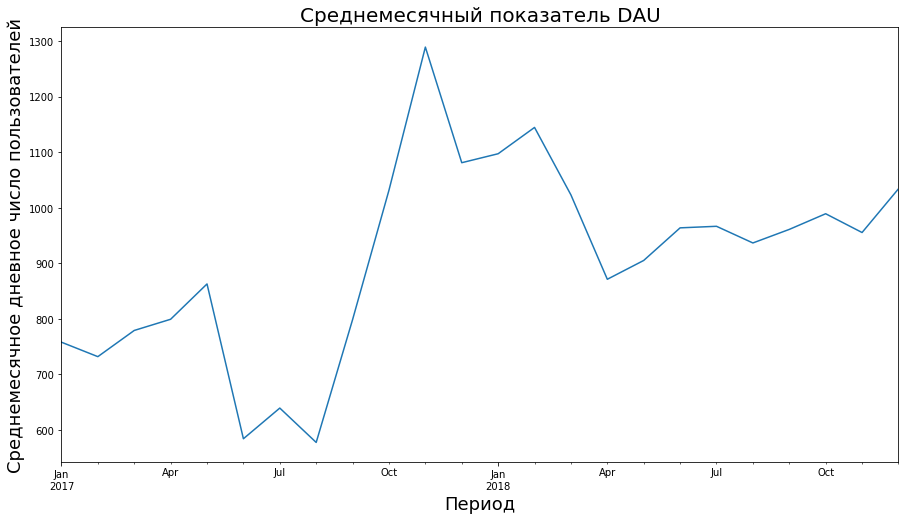

In [603]:
visits_mean_dau.groupby('month').agg({'uid' : 'mean'}).plot(figsize = (15,8), legend = None)
plt.title('Среднемесячный показатель DAU', fontsize = 20)
plt.xlabel('Период', fontsize = 18)
plt.ylabel('Среднемесячное дневное чиcло пользователей', fontsize = 18)
plt.show()

In [604]:
print('В среднем каждый день сервисом пользуется {} пользователей.'.format(dau))

В среднем каждый день сервисом пользуется 908 пользователей.


In [605]:
visits['year'] = visits['start_ts'].dt.year
visits['month'] = visits['start_ts'].dt.month
visits['week'] = visits['start_ts'].dt.week

In [606]:
wau = visits.groupby(['year', 'week']).agg({'uid' : 'nunique'}).mean().round().astype('int')[0]
mau = visits.groupby(['year', 'month']).agg({'uid' : 'nunique'}).mean().round().astype('int')[0]

In [607]:
print('В среднем каждую неделю сервисом пользуется {} пользователей, каждый месяц - {} пользователей.'.format(wau, mau))

В среднем каждую неделю сервисом пользуется 4387 пользователей, каждый месяц - 12301 пользователей.


In [608]:
day_uid_visits = visits.groupby(['date', 'uid']).agg({'start_ts' : 'count'}).mean().round(2)[0]

>   **_<span style="color:red"> ~~В этом разделе мне сильно не хватило графиков – по ним можно увидеть глобальные тренды. Так как дней в датасете достаточно много, и подневной график будет шумным, то попробуй дополнительно посчитать среднемесячный DAU.~~</span>_**

<div class="alert alert-block alert-info">
#Учел)
</div>

In [609]:
print('В среднем в день пользователь посещает сайт {} раз.'.format(day_uid_visits))

В среднем в день пользователь посещает сайт 1.08 раз.


In [610]:
visits['duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

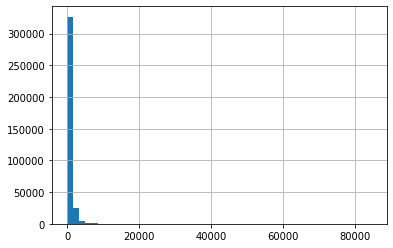

In [611]:
visits['duration'].hist(bins = 50)
plt.show()

>   **_<span style="color:red"> ~~Ой, мне кажется тут дело в том, что из начала сессии ты вычел ее конец, а не наоборот, и из-за типа данных `datetime` и приведения к секундам произошли какие-то неявные и странные преобразования типов.~~</span>_**

<div class="alert alert-block alert-info">
#Да, косякнул, причем сначала было норм, потом что-то переписал и не земетил)))
</div>

#Так как распеределние далеко от нормального, пик около нулевых отметок, то среднее тут не будет редевантной статистикой, нужно найти моду.

In [612]:
visits['duration'].mode()

0    60
dtype: int64

#На вопрос о том как часто пользователи возвращаются ответим в разрезе двух плоскостей:
недельный и месячный Sticky factor.

In [613]:
week_sticky_factor = dau/wau 
month_sticky_factor = dau/mau

In [614]:
print('Недельная вовлеченность пользователей -  {:.1%},  месячная вовлеченность пользователей -  {:.1%}.'.format(week_sticky_factor, month_sticky_factor))

Недельная вовлеченность пользователей -  20.7%,  месячная вовлеченность пользователей -  7.4%.


# Продажи

In [615]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [616]:
orders.rename(columns = {'Buy Ts' : 'buy_ts', 'Revenue' : 'revenue', 'Uid' : 'uid'}, inplace = True)

In [617]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null object
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [618]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format="%Y-%m-%d %H:%M:%S")

#Определим в первом датасэте время первого входа в систему, а потом смержим ее с таблицей заказов и найдем дельту.

In [619]:
visits_first = visits.groupby('uid')['start_ts'].min()

In [620]:
visits_first.name = 'first_time'

In [621]:
orders = orders.merge(visits_first, on = 'uid')

In [622]:
orders['time_delta'] = (orders.buy_ts - orders.first_time).dt.seconds

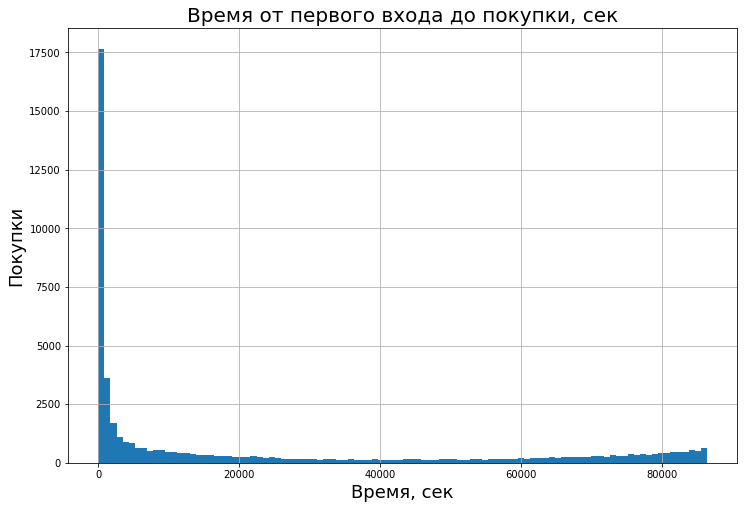

In [623]:
orders['time_delta'].hist(bins = 100, figsize = (12,8))
plt.title('Время от первого входа до покупки, сек', fontsize = 20)
plt.xlabel('Время, сек', fontsize = 18)
plt.ylabel('Покупки', fontsize = 18)
plt.show()

In [624]:
time_delta = orders['time_delta'].mode()[0]

In [625]:
print('Наиболее часто покупки совершаются уже через {} секунд после первого входа.'.format(time_delta))

Наиболее часто покупки совершаются уже через 60 секунд после первого входа.


<div class="alert alert-block alert-info">
#Не знаю насколько правильно, что сделал так, может стоило привести все к округленным минутам, просто секунды - уж не слишком ли мал градиент?
</div>      

> _**<span style="color:orange">Все ок, по-моему в минутах получилось бы то же самое.</span>**_

#Найдем среднее число покупок юзером за период.

In [626]:
orders['year'] = orders['buy_ts'].dt.year
orders['month'] = orders['buy_ts'].dt.month
orders['week'] = orders['buy_ts'].dt.week
orders['date'] = orders['buy_ts'].dt.date

In [627]:
orders.head()

,buy_ts,revenue,uid,first_time,time_delta,year,month,week,date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-01-06 00:09:00,60,2017,6,22,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-01-06 00:14:00,660,2017,6,22,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-01-06 00:25:00,120,2017,6,22,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-01-06 00:14:00,900,2017,6,22,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-01-06 07:31:00,1620,2017,6,22,2017-06-01


In [628]:
mean_day_orders = orders.groupby(['date', 'uid']).agg({'buy_ts' : 'count'}).mean().round(2)[0]
mean_week_orders = orders.groupby(['year', 'week', 'uid']).agg({'buy_ts' : 'count'}).mean().round(2)[0]
mean_month_orders = orders.groupby(['year', 'month', 'uid']).agg({'buy_ts' : 'count'}).mean().round(2)[0]
mean_year_orders = orders.groupby(['year', 'uid']).agg({'buy_ts' : 'count'}).mean().round(2)[0]

In [629]:
print('Среднее число покупок пользователем: \nв день - {} \nв неделю - {}\nв месяц - {}\nза год - {}'.format(mean_day_orders, mean_week_orders, mean_month_orders, mean_year_orders))

Среднее число покупок пользователем: 
в день - 1.08 
в неделю - 1.16
в месяц - 1.23
за год - 1.32


#Выглядит не очень. Получается, что сервер в среднем используется для просмотра времени сеансов, а не для покупки билетов? Или я что-то не так посчитал?


> _**<span style="color:orange">Посчитал правильно, я интерпретирую это так, что большинство пользователей приходит один раз, возможно, за конкрентым билетом по ссылке или что-нибудь такое.</span>**_

In [630]:
print('Средний чек за все время - {:.2f} у.е.'.format(orders.revenue.mean().round(2)))

Средний чек за все время - 5.00 у.е.


#Подсчитаем LTV.

#Здесь уже необходимо поделить юзеров на когорты, посчитаем показатель за все время датасэта. Логично сделать когорты по месяцам.

In [631]:
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

In [632]:
first_orders = orders.groupby('uid').agg({'order_month' : 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']

In [633]:
first_orders.head()

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In [634]:
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid' : 'count'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

In [635]:
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [636]:
orders = orders.merge(first_orders, on = 'uid')

In [637]:
cohorts = orders.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()

In [638]:
cohorts.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


#Отчет по конец мая, заметил что есть строка из июня 2018, думаю ее надо исключить из репорта, так как она не репрезентативна.

In [639]:
report = pd.merge(cohorts, cohort_sizes, on = 'first_order_month')


In [640]:
report['age'] = ((report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')).round().astype('int')

In [641]:
report = report.query('first_order_month != "2018-06-01"')

In [642]:
report.head()

,first_order_month,order_month,revenue,n_buyers,age
0,2017-06-01,2017-06-01,9557.49,2023,0
1,2017-06-01,2017-07-01,981.82,2023,1
2,2017-06-01,2017-08-01,885.34,2023,2
3,2017-06-01,2017-09-01,1931.30,2023,3
4,2017-06-01,2017-10-01,2068.58,2023,4


In [643]:
report['ltv'] = (report['revenue'] / report['n_buyers']).round(2)

#Построим сводную таблицу

In [644]:
output = report.pivot_table(index = report['first_order_month'].dt.date, columns = 'age', values = 'ltv', aggfunc = 'mean')

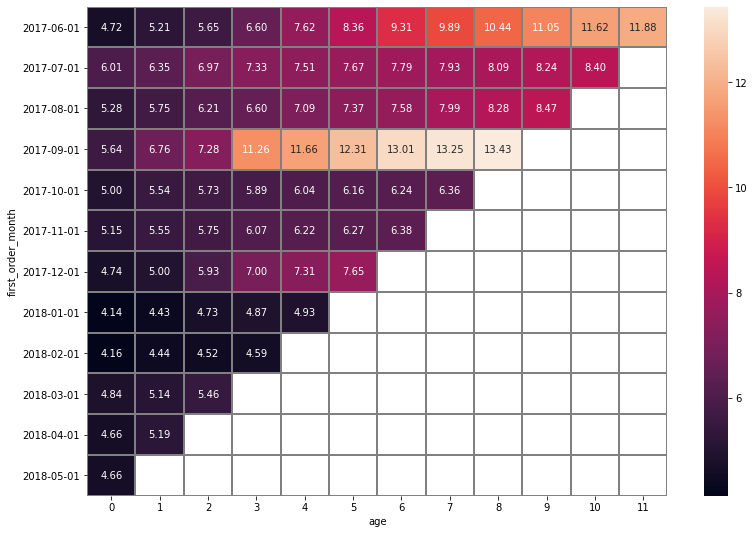

In [645]:
plt.figure(figsize = (13,9))
sns.heatmap(output.cumsum(axis =1), annot=True, fmt='.2f', linewidths=1, linecolor='gray')
plt.show()

#Клиенты покупают в первый месяц, а вот потом совершают все меньше и меньше покупок.

#Посчитаем LTV средней когорты.

In [646]:
ltv_mean = output.cumsum(axis = 1).mean(axis = 0)

In [647]:
ltv_mean

age
0      4.916667
1      5.396364
2      5.823000
3      6.690000
4      7.297500
5      7.970000
6      8.385000
7      9.084000
8     10.060000
9      9.253333
10    10.010000
11    11.880000
dtype: float64

#Поскольку когорта сентября 2017 несколько аномальна в накопительном LTV, когда она "выключается" из расчета мы наблюдаем снижение LTV на 10 месяце наюлюдений.

>**_<span style="color:green">В этой части отчета все хорошо!</span>_**

# Маркетинг

In [648]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [649]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [650]:
costs['dt'] = pd.to_datetime(costs['dt'])

In [651]:
costs['source_id'] = costs['source_id'].astype('category', inplace = True)

#Сгруппирую затраты по месяцу.

In [652]:
costs['month_of_cost'] = costs['dt'].astype('datetime64[M]').dt.date


In [653]:
costs_report = costs.pivot_table(index = 'month_of_cost', columns = 'source_id', values = 'costs', aggfunc = 'sum', margins = True, margins_name = 'Total')

In [654]:
costs_report.head(20)


source_id,1,2,3,4,5,9,10,Total
month_of_cost,,,,,,,,
2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22,18015.00
2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82,18240.59
2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57,14790.54
2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67,24368.91
2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24,36322.88
2017-11-01,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36,37907.88
2017-12-01,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86,38315.35
2018-01-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35,33518.52
2018-02-01,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88,32723.03


In [655]:
print('По исчточникам рекламы за все время расходы распеределились следующим образом:')
print()
print(pd.DataFrame(costs_report.loc['Total', :]))
print()
print('По периоду затрат:')
print(pd.DataFrame(costs_report.loc[:, 'Total']))
print()
print('В сумме : ' + str(costs_report.loc['Total', 'Total']) + ' y.e.')



По исчточникам рекламы за все время расходы распеределились следующим образом:

               Total
source_id           
1           20833.27
2           42806.04
3          141321.63
4           61073.60
5           51757.10
9            5517.49
10           5822.49
Total      329131.62

По периоду затрат:
                   Total
month_of_cost           
2017-06-01      18015.00
2017-07-01      18240.59
2017-08-01      14790.54
2017-09-01      24368.91
2017-10-01      36322.88
2017-11-01      37907.88
2017-12-01      38315.35
2018-01-01      33518.52
2018-02-01      32723.03
2018-03-01      30415.27
2018-04-01      22289.38
2018-05-01      22224.27
Total          329131.62

В сумме : 329131.62 y.e.


<div class="alert alert-block alert-info">

Мне не еравится отчет в таком виде, выгдит технично, не для заказчика.

</div>

In [656]:
marketing_device = pd.merge(orders.query('first_order_month != "2018-06-01"'), visits, on = 'uid')

In [657]:
marketing_device.head()

,buy_ts,revenue,uid,first_time,time_delta,year_x,month_x,week_x,date_x,order_month,first_order_month,device,end_ts,source_id,start_ts,date_y,year_y,month_y,week_y,duration
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-01-06 00:09:00,60,2017,6,22,2017-06-01,2017-06-01,2017-06-01,desktop,2017-01-06 00:11:00,1,2017-01-06 00:09:00,2017-01-06,2017,1,1,120
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-01-06 00:14:00,660,2017,6,22,2017-06-01,2017-06-01,2017-06-01,desktop,2017-01-06 00:25:00,2,2017-01-06 00:14:00,2017-01-06,2017,1,1,660
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-01-06 00:25:00,120,2017,6,22,2017-06-01,2017-06-01,2017-06-01,desktop,2017-01-06 00:34:00,2,2017-01-06 00:25:00,2017-01-06,2017,1,1,540
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-01-06 00:14:00,900,2017,6,22,2017-06-01,2017-06-01,2017-06-01,desktop,2017-01-06 00:33:00,2,2017-01-06 00:14:00,2017-01-06,2017,1,1,1140
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-01-06 07:31:00,1620,2017,6,22,2017-06-01,2017-06-01,2017-06-01,desktop,2017-01-06 07:59:00,3,2017-01-06 07:31:00,2017-01-06,2017,1,1,1680


In [658]:
marketing_device = marketing_device.pivot_table(index = 'first_order_month', columns = 'device', values = 'uid', aggfunc = 'nunique')




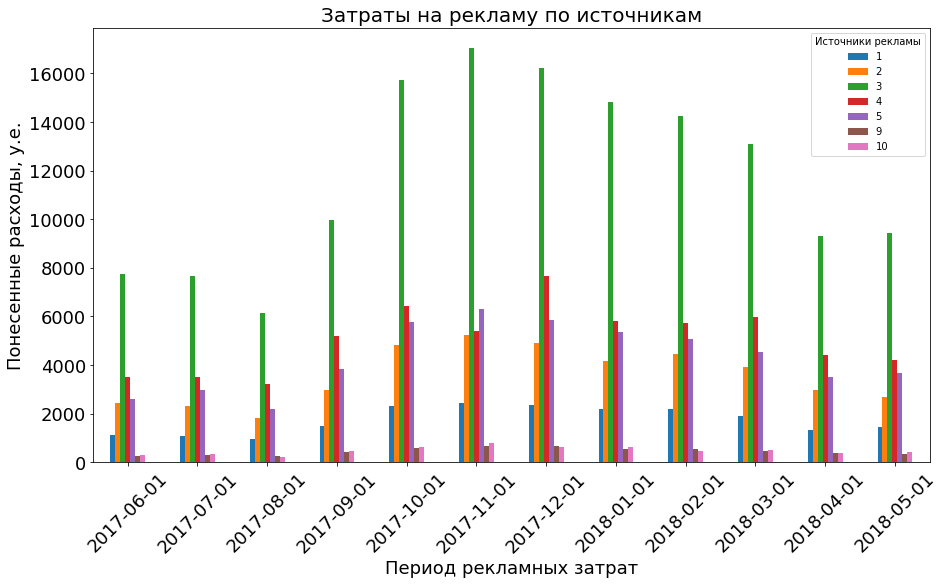

In [659]:
costs_report.iloc[:-1,:-1].plot(kind = 'bar', figsize = (15,8), rot = 45, fontsize = 18) 
plt.xlabel('Период рекламных затрат', fontsize = 18)
plt.ylabel('Понесенные расходы, у.е.', fontsize = 18)
plt.title('Затраты на рекламу по источникам', fontsize = 20)
plt.legend(title = 'Источники рекламы')
plt.show()

>**_<span style="color:green">Отличная визуализация!</span>_**

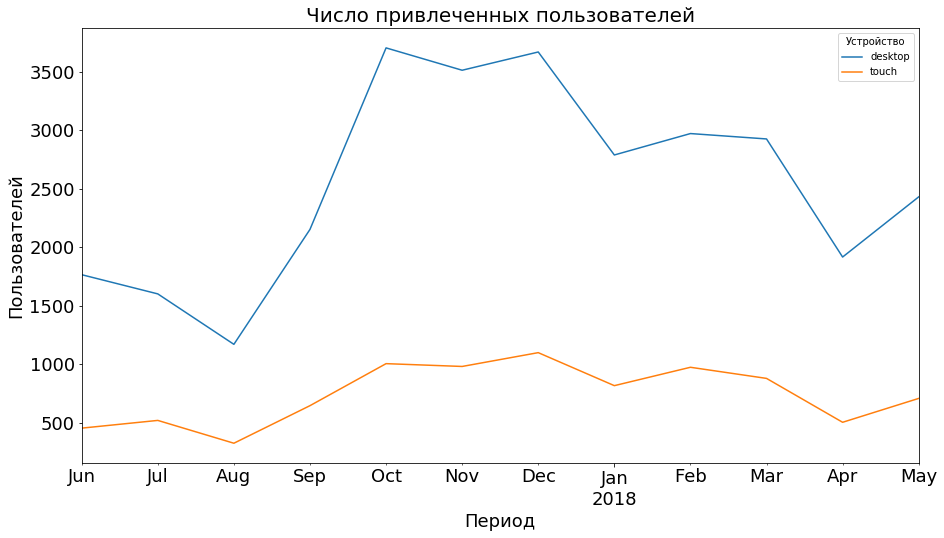

In [660]:
device = ['desktop', 'touch']
for r in device:
    marketing_device[r].plot(figsize = (15,8), fontsize = 18)
    plt.xlabel('Период', fontsize = 18)
    plt.ylabel('Пользователей', fontsize = 18)
    plt.title('Число привлеченных пользователей', fontsize = 20)
plt.legend(device, title = 'Устройство')
plt.show()


#По-моему в эпоху планшетов и смартфонов слишком мала пропрция пользователей с тачей. 

>**_<span style="color:green">Да, интересный инсайт. Ну и печально, что доля мобильных устройств не растет (а априорно  она растет).</span>_**

In [661]:
marketing_device

device,desktop,touch
first_order_month,,
2017-06-01,1765,454
2017-07-01,1601,520
2017-08-01,1170,325
2017-09-01,2152,646
2017-10-01,3703,1005
2017-11-01,3512,981
2017-12-01,3668,1099
2018-01-01,2788,817
2018-02-01,2971,974


In [662]:
costs_per_user = costs.groupby('month_of_cost').agg({'costs' : 'sum'})

In [663]:
costs_per_user.reset_index(inplace = True)

In [664]:
costs_per_user['month_of_cost'] = pd.to_datetime(costs_per_user['month_of_cost'])

In [665]:
visits.head()

,uid,device,end_ts,source_id,start_ts,date,year,month,week,duration
0,16879256277535980062,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,2017-12-20,2017,12,51,1080
1,104060357244891740,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,2018-02-19,2018,2,8,1680
2,7459035603376831527,touch,2017-01-07 01:54:00,5,2017-01-07 01:54:00,2017-01-07,2017,1,1,0
3,16174680259334210214,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,2018-05-20,2018,5,20,1440
4,9969694820036681168,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,2017-12-27,2017,12,52,0


In [666]:
orders.head()

,buy_ts,revenue,uid,first_time,time_delta,year,month,week,date,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-01-06 00:09:00,60,2017,6,22,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-01-06 00:14:00,660,2017,6,22,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-01-06 00:25:00,120,2017,6,22,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-01-06 00:14:00,900,2017,6,22,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-01-06 07:31:00,1620,2017,6,22,2017-06-01,2017-06-01,2017-06-01


In [667]:
first_visit_source = visits.loc[:,['uid', 'source_id']]

In [668]:
first_orders = first_orders.merge(first_visit_source, on = 'uid')
first_orders.head()


,uid,first_order_month,source_id
0,313578113262317,2018-01-01,2
1,313578113262317,2018-01-01,2
2,313578113262317,2018-01-01,2
3,1575281904278712,2017-06-01,10
4,1575281904278712,2017-06-01,10


In [669]:
visits_new = visits.groupby('uid').agg({'start_ts' : 'min'}).reset_index()
visits_new.columns = ['uid', 'start_ts']

In [670]:
visits_new.head()

,uid,start_ts
0,11863502262781,2018-01-03 17:27:00
1,49537067089222,2018-06-02 15:55:00
2,297729379853735,2017-07-06 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [671]:
visits_new = visits_new.merge(visits[['start_ts' ,'uid', 'source_id']], on = ['start_ts' ,'uid'], how = 'inner')
    

In [672]:
visits_new.head()

,uid,start_ts,source_id
0,11863502262781,2018-01-03 17:27:00,3
1,49537067089222,2018-06-02 15:55:00,2
2,297729379853735,2017-07-06 18:47:00,3
3,313578113262317,2017-09-18 22:49:00,2
4,325320750514679,2017-09-30 14:29:00,5


In [673]:
orders.head()

,buy_ts,revenue,uid,first_time,time_delta,year,month,week,date,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-01-06 00:09:00,60,2017,6,22,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-01-06 00:14:00,660,2017,6,22,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-01-06 00:25:00,120,2017,6,22,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-01-06 00:14:00,900,2017,6,22,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-01-06 07:31:00,1620,2017,6,22,2017-06-01,2017-06-01,2017-06-01


In [674]:
orders_new2 = orders.merge(visits_new, on = 'uid')

In [675]:
cohorts_size_2 = orders_new2.query('first_order_month != "2018-06-01" and source_id != 7').groupby(['first_order_month', 'source_id']).agg({'uid' : 'nunique'}).reset_index()
cohorts_size_2.rename(columns = {'uid' : 'n_users'}, inplace = True)
cohorts_size_2.head(10)

,first_order_month,source_id,n_users
0,2017-06-01,1,189
1,2017-06-01,2,240
2,2017-06-01,3,626
3,2017-06-01,4,417
4,2017-06-01,5,380
5,2017-06-01,9,81
6,2017-06-01,10,90
7,2017-07-01,1,160
8,2017-07-01,2,239
9,2017-07-01,3,492


In [676]:

cohorts_source = orders_new2.query('first_order_month != "2018-06-01" and source_id != 7').groupby(['first_order_month', 'order_month', 'source_id']).agg({'revenue' : 'sum'}).reset_index()
cohorts_source = cohorts_source.merge(cohorts_size_2, on = ['first_order_month', 'source_id'])
cohorts_source['ltv'] = (cohorts_source.revenue / cohorts_source.n_users).round(2)
cohorts_source.head(5)



,first_order_month,order_month,source_id,revenue,n_users,ltv
0,2017-06-01,2017-06-01,1,1344.02,189,7.11
1,2017-06-01,2017-07-01,1,224.88,189,1.19
2,2017-06-01,2017-08-01,1,142.28,189,0.75
3,2017-06-01,2017-09-01,1,756.13,189,4.00
4,2017-06-01,2017-10-01,1,461.67,189,2.44


In [677]:
cohorts_source['age'] = ((cohorts_source['order_month'] - cohorts_source['first_order_month']) / np.timedelta64(1, 'M')).round().astype('int')
cohorts_source['first_order_month'] = cohorts_source['first_order_month'].dt.date

In [678]:
output_2 = cohorts_source.pivot_table(index = ['age', 'source_id'], columns = 'first_order_month', values = 'ltv', aggfunc = 'mean').reset_index(level =1)



In [679]:
output_2.head()

first_order_month,source_id,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
age,,,,,,,,,,,,,
0,1,7.11,5.93,6.98,5.43,6.17,7.75,4.60,5.61,4.49,7.61,6.22,5.25
0,2,4.54,9.08,5.39,10.37,7.74,6.50,8.46,4.65,5.35,6.63,5.62,6.81
0,3,4.27,5.37,4.87,5.01,4.59,4.53,4.18,4.04,3.79,4.26,4.00,3.89
0,4,4.83,5.53,5.27,5.44,4.28,4.88,4.04,3.87,4.16,4.50,4.99,4.67
0,5,5.10,6.07,5.30,5.34,5.26,4.76,5.16,4.21,4.26,4.96,4.41,4.12


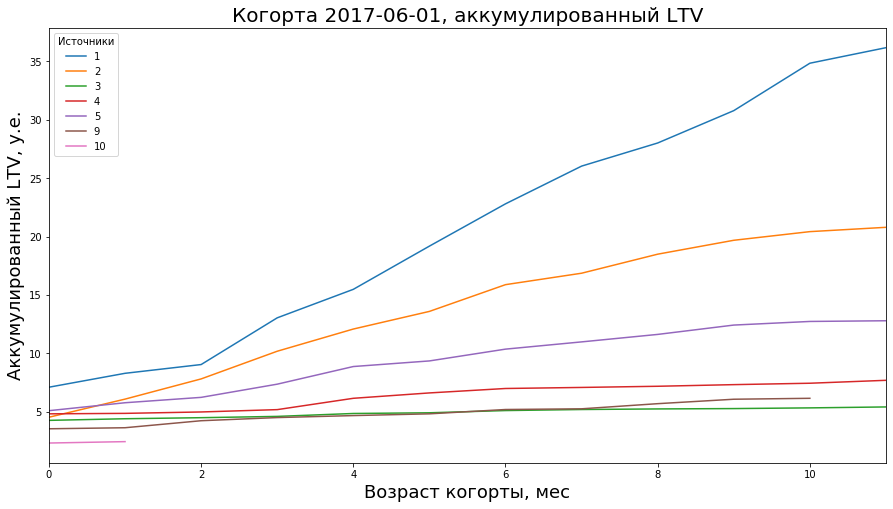

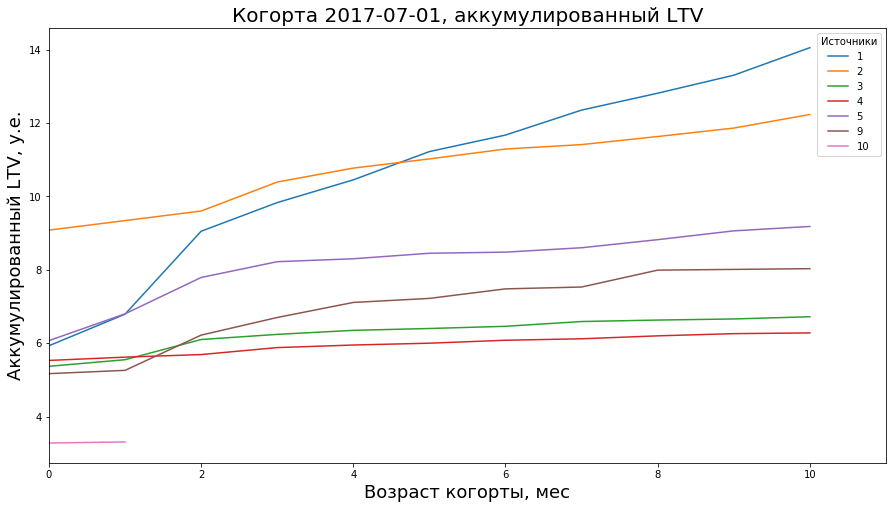

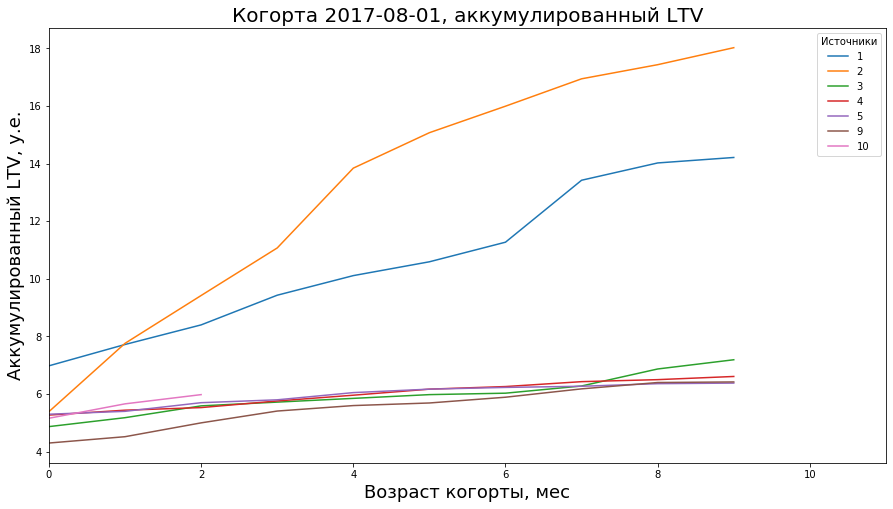

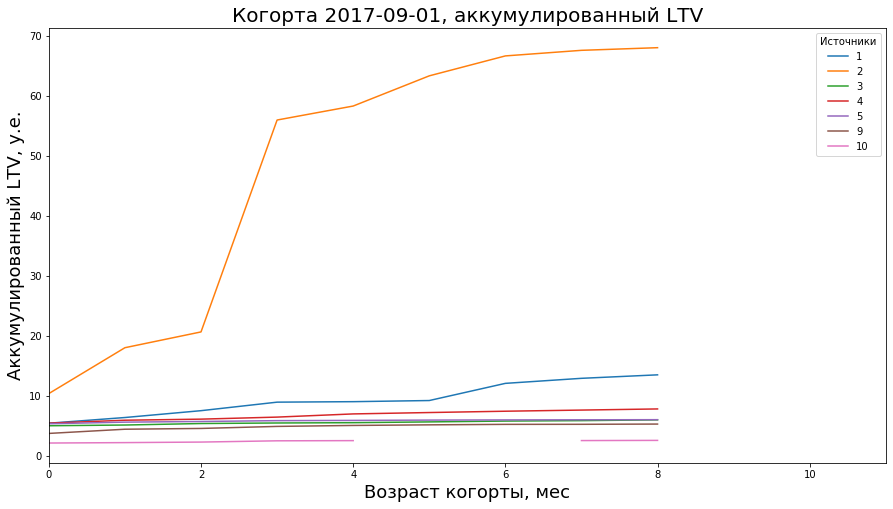

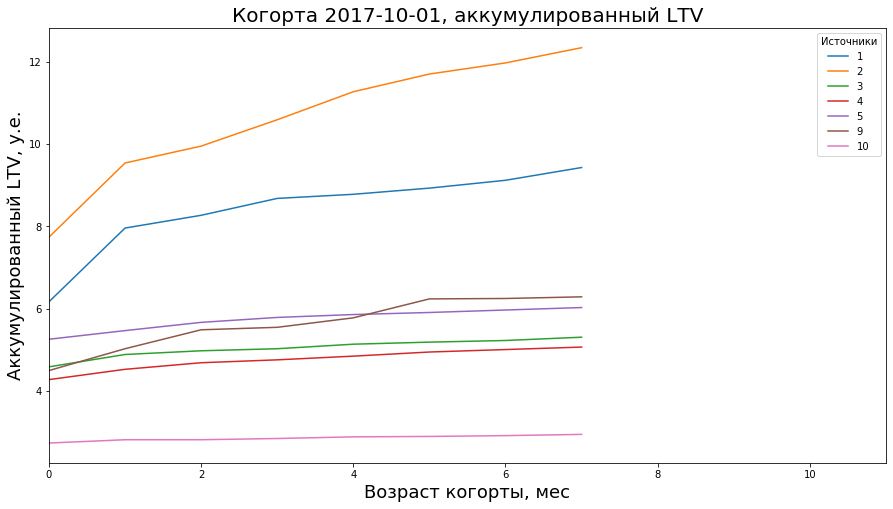

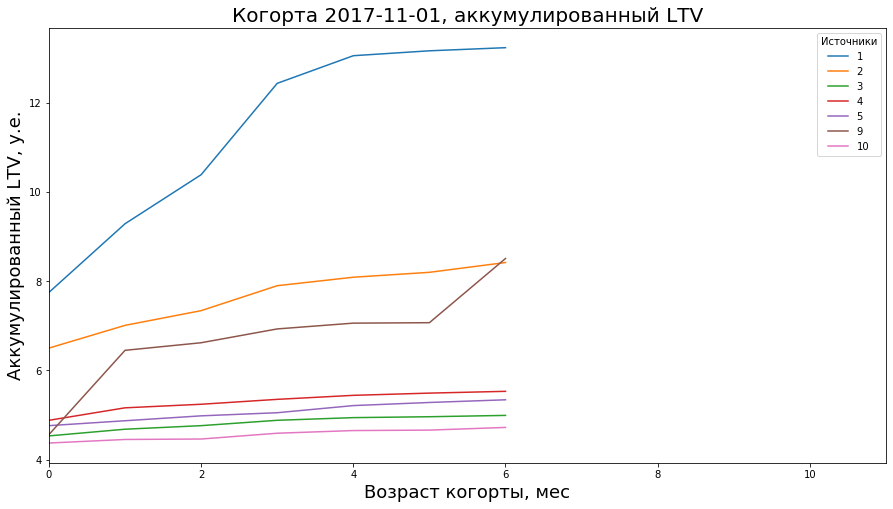

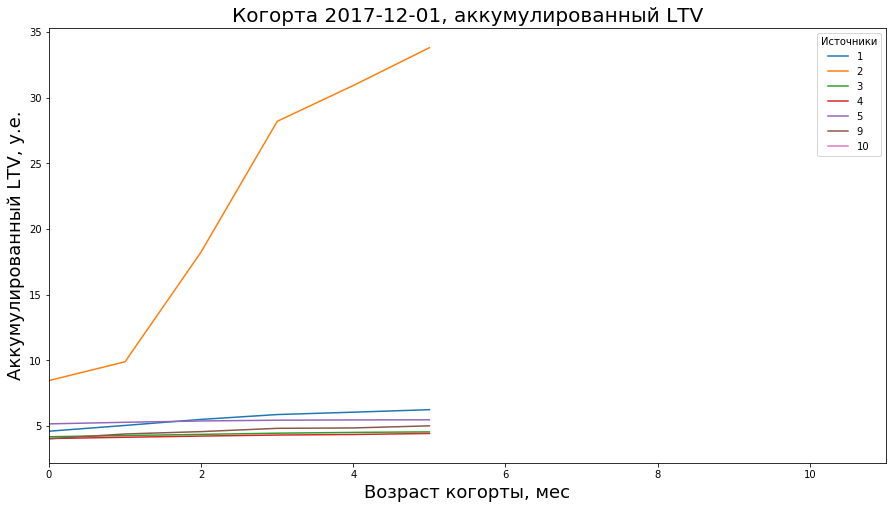

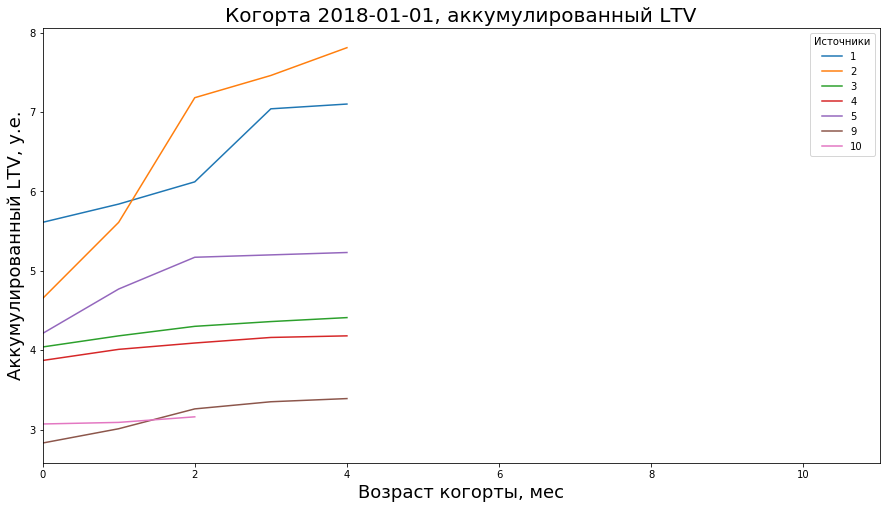

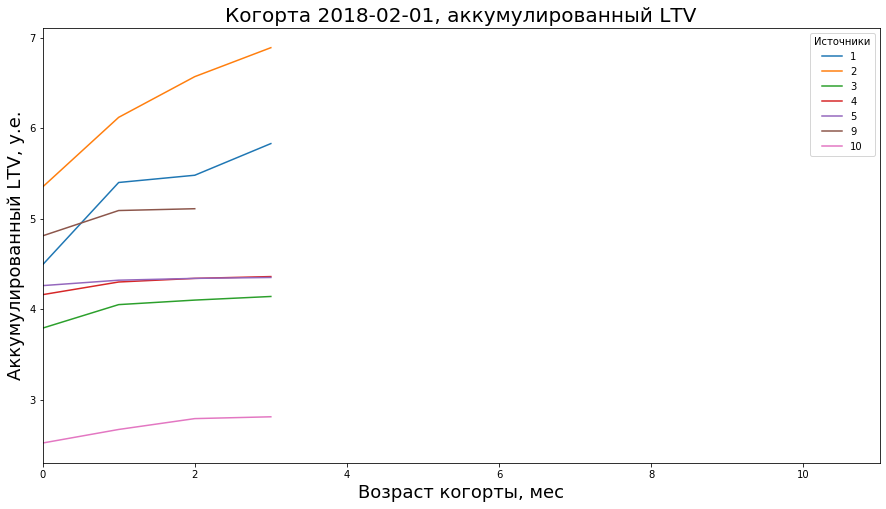

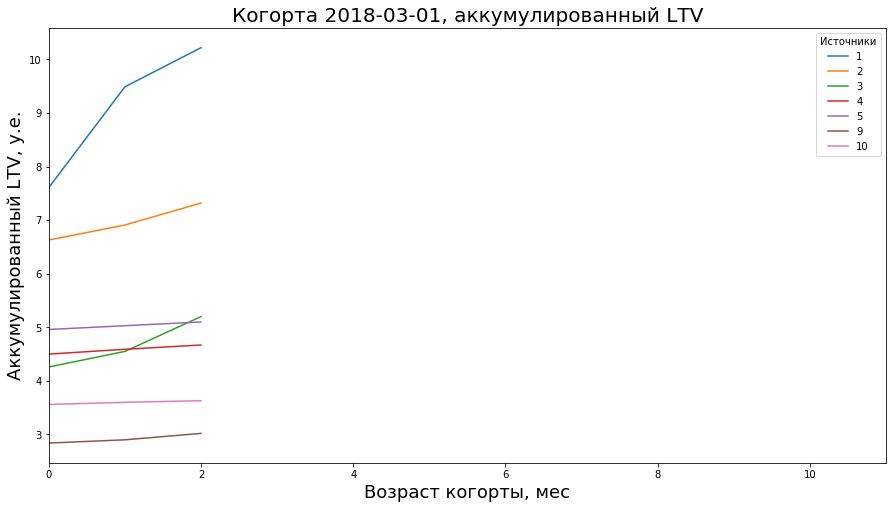

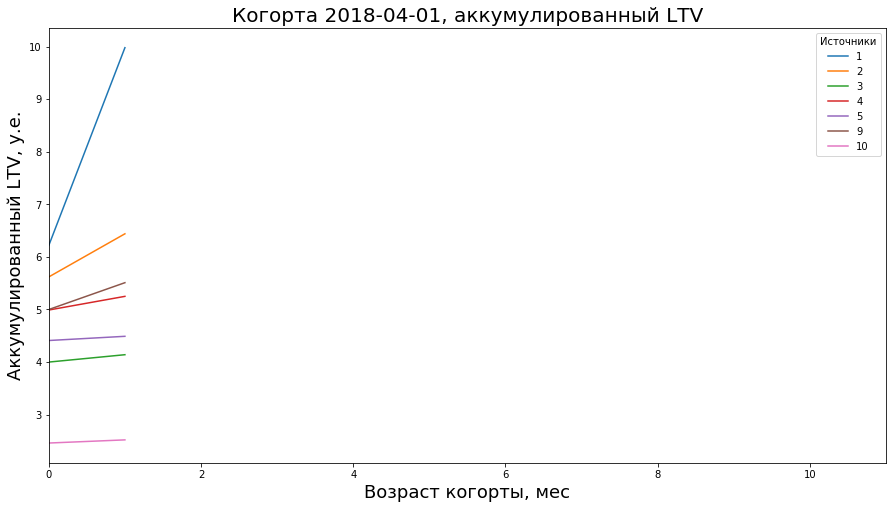

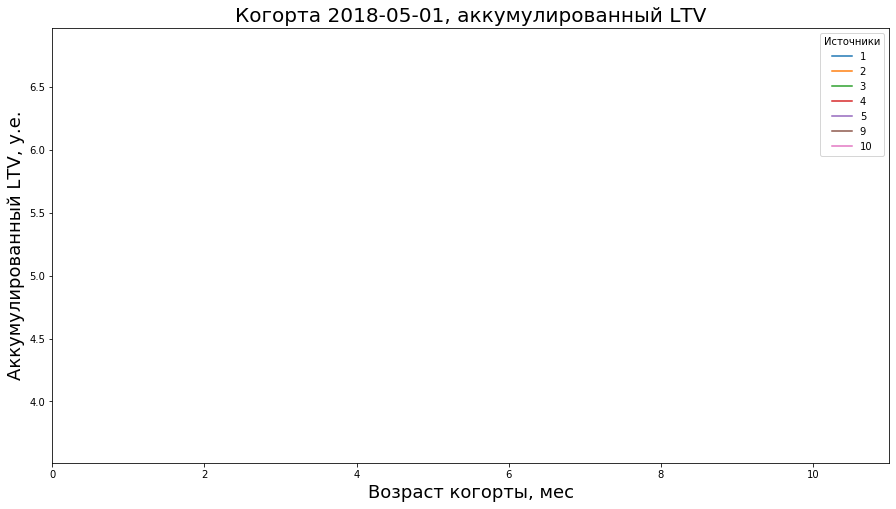

In [680]:
for c in cohorts_source['first_order_month'].unique():
    for s in cohorts_source['source_id'].unique():
        output_2.query('source_id == @s').loc[:,c].cumsum().plot(figsize = (15, 8))
    plt.xlabel('Возраст когорты, мес', fontsize = 18)
    plt.ylabel('Аккумулированный LTV, у.е.', fontsize = 18)
    plt.title('Когорта ' + str(c) + ', аккумулированный LTV', fontsize = 20)
    plt.legend(cohorts_source['source_id'].unique(), title = 'Источники')
    plt.show()

#Самые прибыльные по всем когортам 1 и 2 источники.

>   **_<span style="color:red">В заказах нет, но мы можем принять модель атрибуции (эту фразу полезно загуглить и запомнить) такую, что покупка приписывается тому источнику трафика, с которого произошла первая сессия. И тогда можем посчитать когорты по источнику траффика, их LTV и ROI. Давай сделаем такое упражнение. </span>_**

In [681]:
costs_per_user['month_of_cost'] = costs_per_user['month_of_cost'].dt.date
report['first_order_month'] = report['first_order_month'].dt.date

In [682]:
cohorts_source = cohorts_source.merge(costs_per_user, left_on = 'first_order_month', right_on = 'month_of_cost')
cohorts_source = cohorts_source.merge(report[['first_order_month', 'n_buyers']], on = 'first_order_month')
cohorts_source.rename(columns = {'n_users' : 'n_buyers', 'n_buyers' : 'n_buyers_total'}, inplace = True)
cohorts_source.head()

,first_order_month,order_month,source_id,revenue,n_buyers,ltv,age,month_of_cost,costs,n_buyers_total
0,2017-06-01,2017-06-01,1,1344.02,189,7.11,0,2017-06-01,18015.0,2023
1,2017-06-01,2017-06-01,1,1344.02,189,7.11,0,2017-06-01,18015.0,2023
2,2017-06-01,2017-06-01,1,1344.02,189,7.11,0,2017-06-01,18015.0,2023
3,2017-06-01,2017-06-01,1,1344.02,189,7.11,0,2017-06-01,18015.0,2023
4,2017-06-01,2017-06-01,1,1344.02,189,7.11,0,2017-06-01,18015.0,2023


In [683]:
cohorts_source['source_share'] = (cohorts_source['n_buyers'] / cohorts_source['n_buyers_total']).round(2)

In [684]:
cohorts_source['source_cac'] = ((cohorts_source['costs'] * cohorts_source['source_share']) / cohorts_source['n_buyers']).round()
cohorts_source['source_romi'] = (cohorts_source['ltv'] / cohorts_source['source_cac']).round(2)

In [685]:
output_3 = cohorts_source.pivot_table(index = ['age', 'source_id'], columns = 'first_order_month', values = 'source_romi', aggfunc = 'mean').reset_index(level =1)

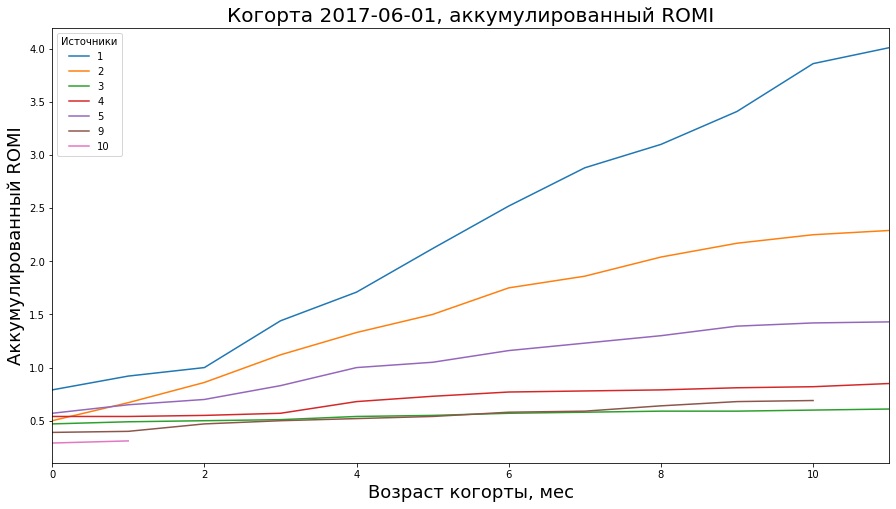

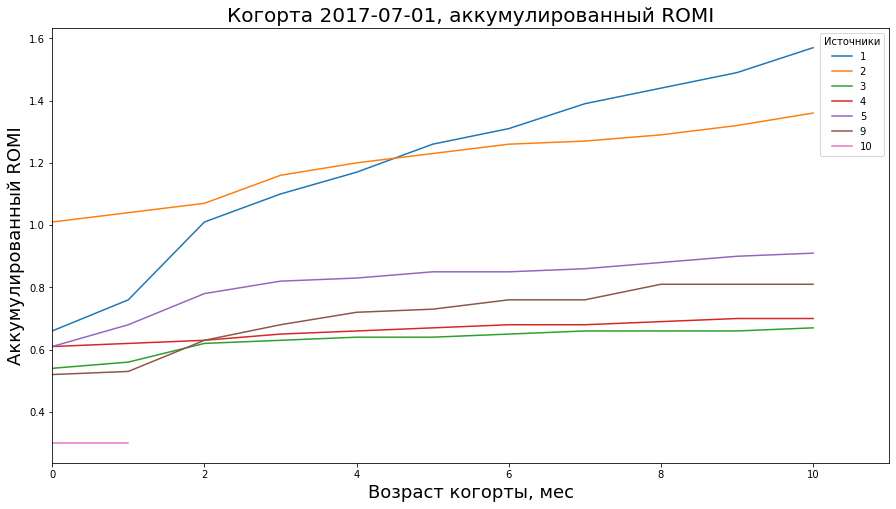

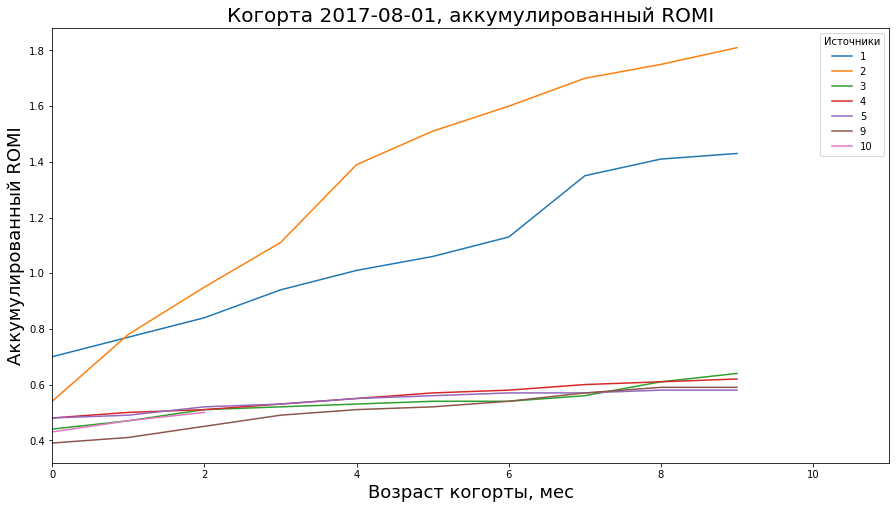

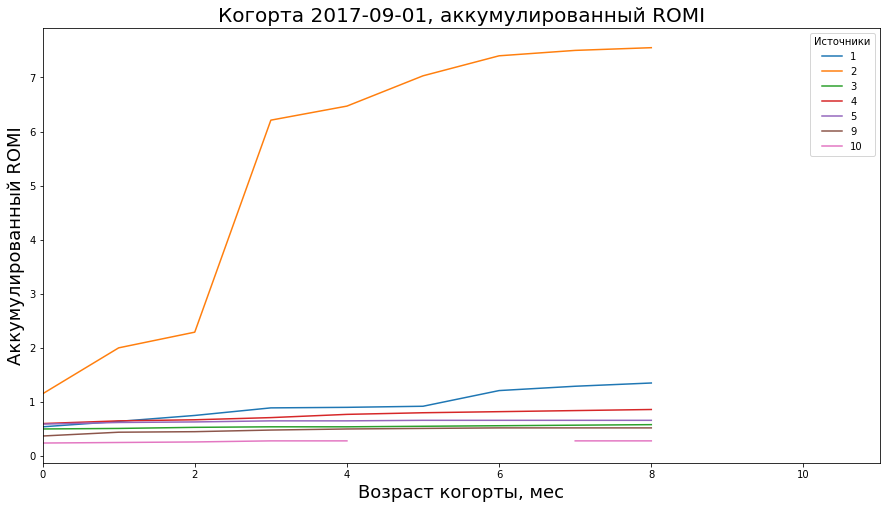

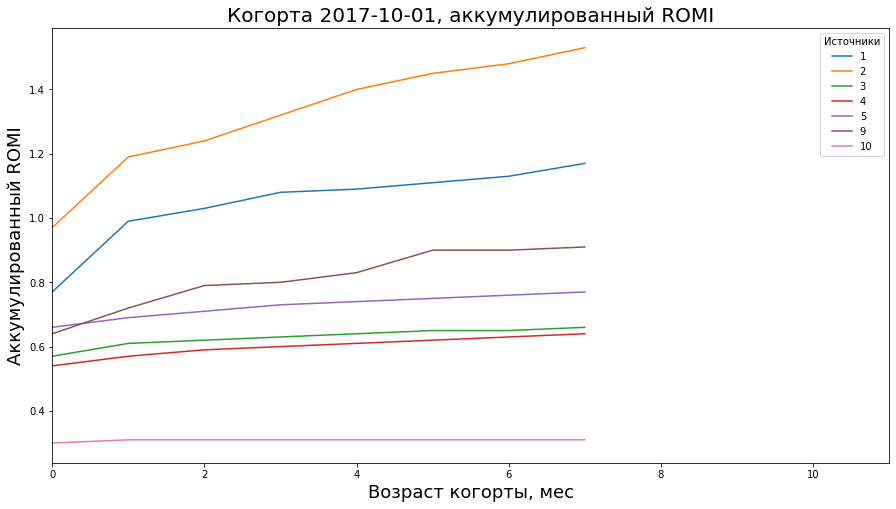

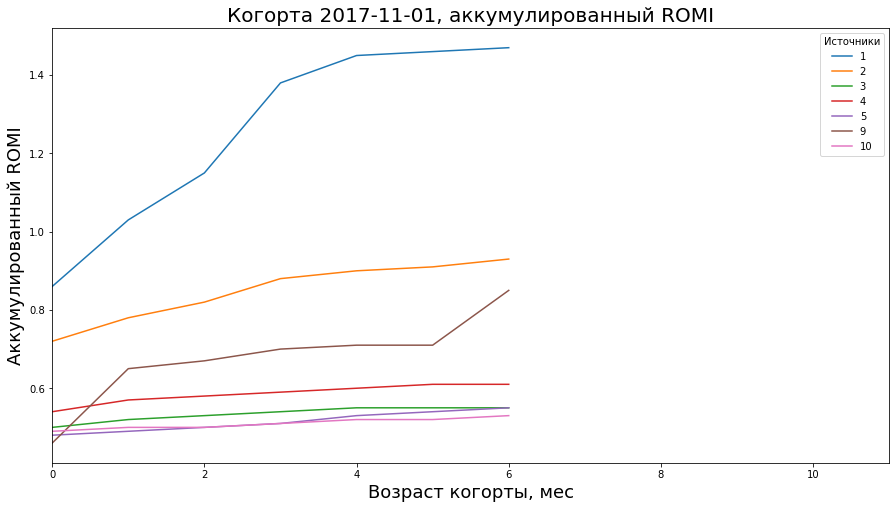

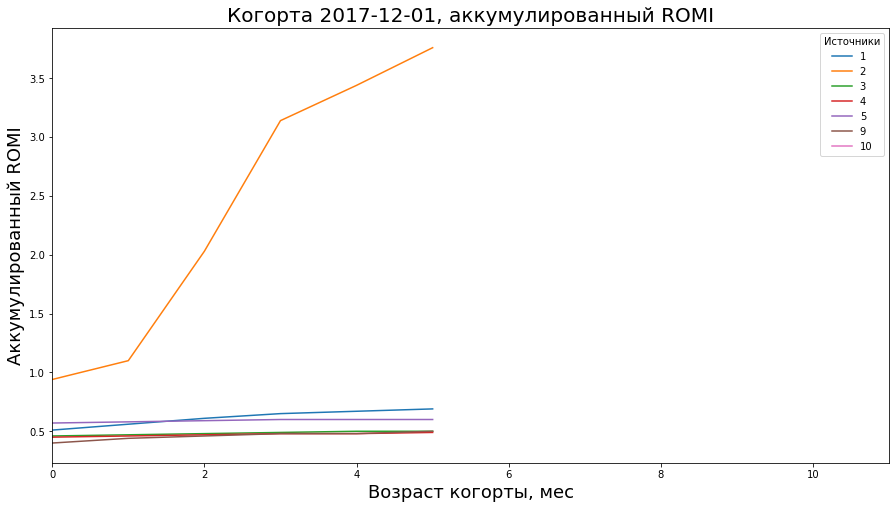

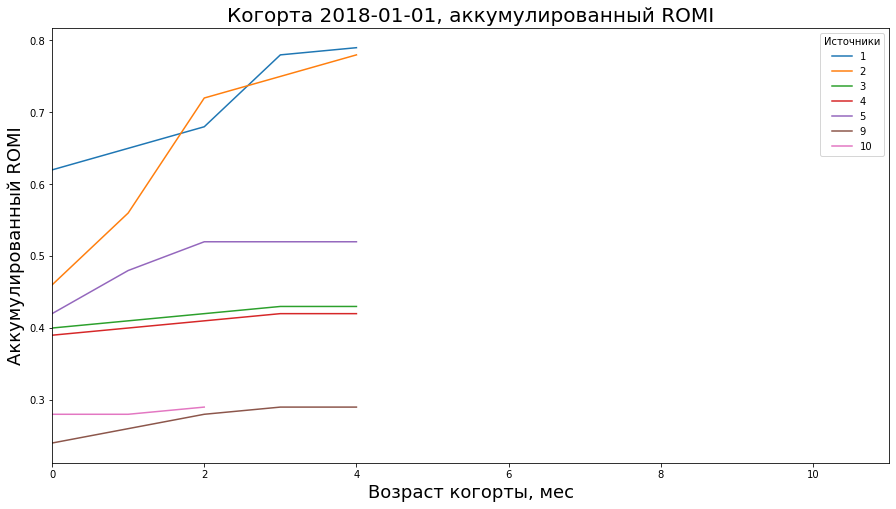

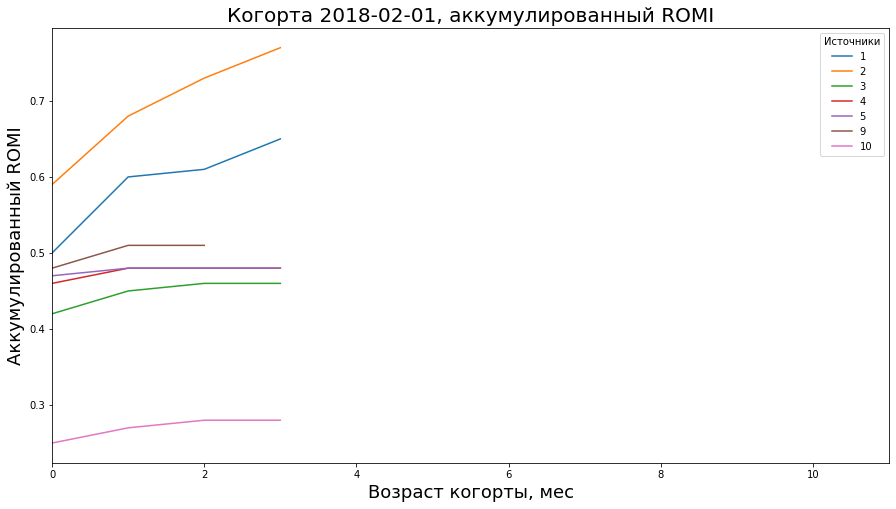

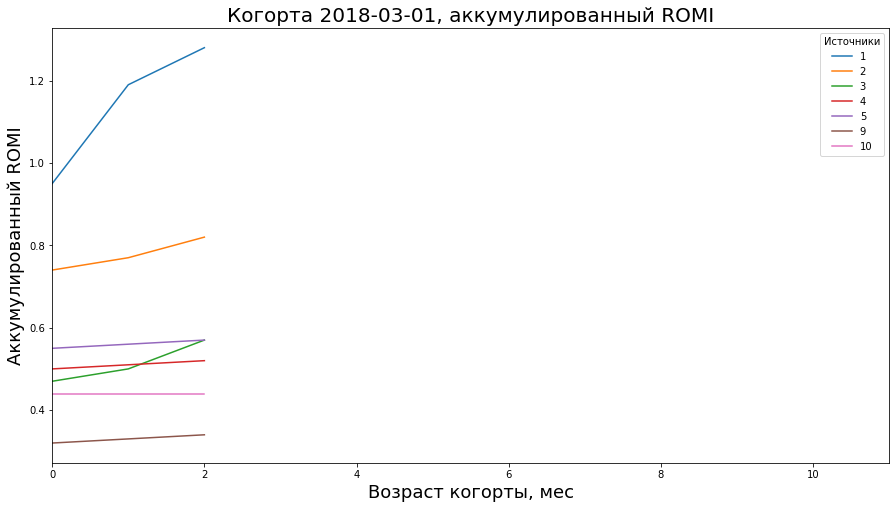

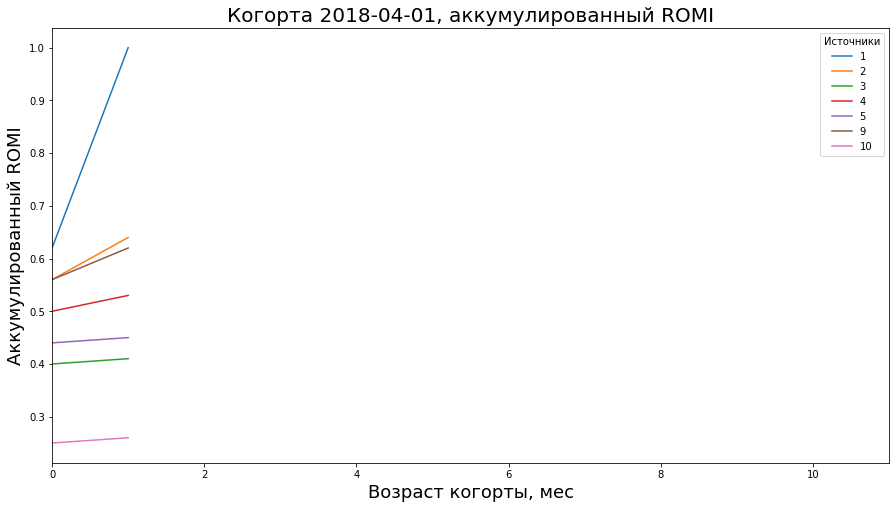

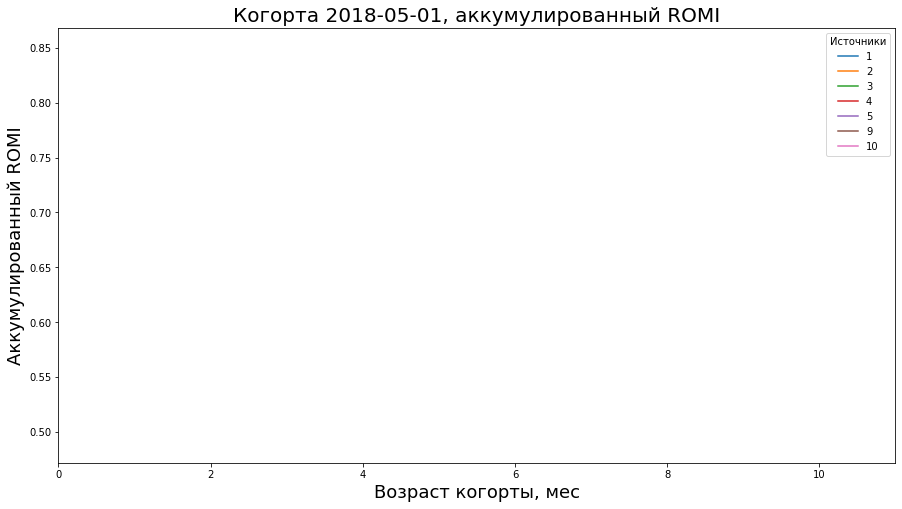

In [686]:
for c in cohorts_source['first_order_month'].unique():
    for s in cohorts_source['source_id'].unique():
        output_3.query('source_id == @s').loc[:,c].cumsum().plot(figsize = (15, 8))
    plt.xlabel('Возраст когорты, мес', fontsize = 18)
    plt.ylabel('Аккумулированный ROMI', fontsize = 18)
    plt.title('Когорта ' + str(c) + ', аккумулированный ROMI', fontsize = 20)
    plt.legend(cohorts_source['source_id'].unique(), title = 'Источники')
    plt.show()

#Отсюда видно, что по сути, источники, кроме 1 и 2, вообще не окупаются, и именно на них стоит делать упор в маркетинге.

>**_<span style="color:green">Крутейше! : )</span>_**

# Аггрегированный ROMI по всем источникам

In [687]:
marketing = pd.merge(report, costs_per_user, left_on = 'first_order_month', right_on = 'month_of_cost')

In [688]:
marketing['cac'] = (marketing['costs'] / marketing['n_buyers']).round()


In [689]:
marketing['romi'] = (marketing['ltv'] / marketing['cac']).round(2)

In [690]:
output_romi = marketing.pivot_table(index = marketing['first_order_month'], columns = 'age', values = 'romi', aggfunc = 'mean')

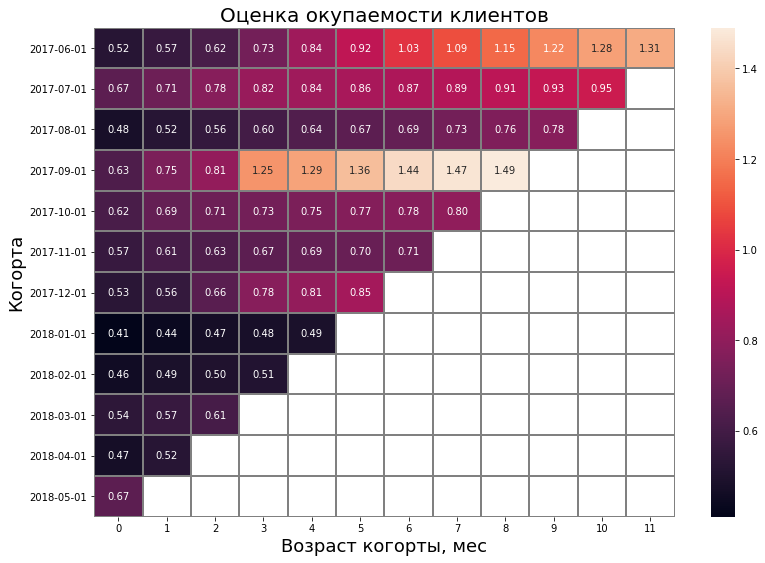

In [691]:
plt.figure(figsize = (13,9))
sns.heatmap(output_romi.cumsum(axis =1), annot=True, fmt='.2f', linewidths=1, linecolor='gray')
plt.xlabel('Возраст когорты, мес', fontsize = 18)
plt.ylabel('Когорта', fontsize = 18)
plt.title('Оценка окупаемости клиентов', fontsize = 20)
plt.show()

In [692]:
output_romi.cumsum(axis =1).mean(axis = 0)

age
0     0.547500
1     0.584545
2     0.635000
3     0.730000
4     0.793750
5     0.875714
6     0.920000
7     0.996000
8     1.077500
9     0.976667
10    1.115000
11    1.310000
dtype: float64

#Видно, что исходя из оценки romni клиенты в среднем, за исключением некоторых когорт, окупаются на 8-9ый месяц после понесения расходов на их привлечение.

<div class="alert alert-block alert-info">
#Тут мне опять не нравится репорт в таком виде, непрезентабельно.
</div> 

>   **_<span style="color:orange">Можно сделать график, почему бы и нет!</span>_**

# Выводы

1) Маркетологам стоит обратить внимание на среднее количество покупок пользователями за период месяц-год. Мало повторных покупок.

2) Как я уже сказал, идет яновное недоиспоьзование приложения с тачей - может оно не удобно? 

3) Как видно из граыфиков - число привлеченных пользователей пропорционально потраченным деньгам на рекламу.
Надо проводить дополнительное исследование болеед детально понять эффективность каждого из источников - возможно, от какого-то надо будет отказаться в пользу более эффективного.

4) Клиенты окупаются в среднем приблизительно после 8-9 месяцев после первой покупки.

5) Самые лучшие источники рекламы - 1 и 2, другие же имеют гораздо больший срок окупаемости либо вообще не окупаются.

> _**Спасибо за проделанную работу! Не удивляйся большому количеству красных замечаний, проект у всех идет достаточно тяжело, требует нетривиальных манипуляций с данными и допускает множество разночтений. Буду ждать проект с доработками, удачи!**_